In [ ]:
!unzip archive\ \(6\).zip

Archive:  archive (6).zip
  inflating: Bangla Sign Language/0/1.JPG  
  inflating: Bangla Sign Language/0/10.JPG  
  inflating: Bangla Sign Language/0/100.JPG  
  inflating: Bangla Sign Language/0/101.JPG  
  inflating: Bangla Sign Language/0/102.JPG  
  inflating: Bangla Sign Language/0/103.JPG  
  inflating: Bangla Sign Language/0/104.JPG  
  inflating: Bangla Sign Language/0/105.JPG  
  inflating: Bangla Sign Language/0/106.JPG  
  inflating: Bangla Sign Language/0/11.JPG  
  inflating: Bangla Sign Language/0/12.JPG  
  inflating: Bangla Sign Language/0/13.JPG  
  inflating: Bangla Sign Language/0/14.JPG  
  inflating: Bangla Sign Language/0/15.JPG  
  inflating: Bangla Sign Language/0/16.JPG  
  inflating: Bangla Sign Language/0/17.JPG  
  inflating: Bangla Sign Language/0/18.JPG  
  inflating: Bangla Sign Language/0/19.JPG  
  inflating: Bangla Sign Language/0/2.JPG  
  inflating: Bangla Sign Language/0/20.JPG  
  inflating: Bangla Sign Language/0/21.JPG  
  inflating: Bangla Sign

In [ ]:
#Importing Libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout, BatchNormalization
#from tensorflow.keras.applications import EfficientNetB2
import warnings

In [ ]:
main_dir = '/content/Bangla Sign Language'
num_classes = 46

In [ ]:
def get_image(path):
    img = cv2.imread(path)
    plt.imshow(img)

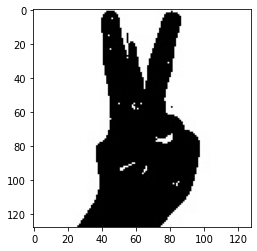

In [ ]:
get_image("/content/Bangla Sign Language/2/100.JPG")

In [ ]:
def datapreprocessing(main_dir,bsize):    
    train_gen = ImageDataGenerator(rescale=1.0/255,validation_split=0.30,)

    train_generator = train_gen.flow_from_directory(directory=main_dir,target_size=(125,125),batch_size=bsize,color_mode="rgb",shuffle=True,subset="training",class_mode='categorical')
    
    valid_generator = train_gen.flow_from_directory(directory=main_dir,target_size=(125,125),batch_size=bsize,color_mode="rgb",shuffle=True,subset="validation",class_mode='categorical')
    
    return train_generator, valid_generator

In [ ]:
traingen, validgen = datapreprocessing(main_dir,bsize=30)

Found 1468 images belonging to 46 classes.
Found 601 images belonging to 46 classes.


In [ ]:
def imageclf(input_shape):
    model = ks.models.Sequential()
    model.add(ks.layers.Conv2D(16,(6,6),strides=2,activation="relu",padding='same',name="layer1",input_shape=input_shape))
    model.add(ks.layers.MaxPooling2D(pool_size=2))
    model.add(ks.layers.Dropout(0.5))
    model.add(ks.layers.Conv2D(32,(3,3),strides=1,padding="same",activation="relu",name="layer2"))
    model.add(ks.layers.MaxPooling2D(pool_size=2,strides=2))
    model.add(ks.layers.Dropout(0.5))
    model.add(ks.layers.Conv2D(64,(3,3),strides=1,padding="same",activation="relu",name="layer3"))
    model.add(ks.layers.MaxPooling2D(pool_size=2,strides=2))
    model.add(ks.layers.Dropout(0.5))
    
    model.add(ks.layers.Flatten())
    model.add(ks.layers.Dense(128,activation="relu",name="layer4"))
    model.add(ks.layers.Dropout(0.5))
    
    model.add(ks.layers.Dense(46,activation="softmax",name="output"))

    model.summary()
    return model

In [ ]:
input_shape = traingen.image_shape
input_shape

(125, 125, 3)

In [ ]:
def compiler(model,train_generator,valid_generator,epchs,bsize,lr=0.0001):
    callbck = ks.callbacks.EarlyStopping(monitor='val_loss',patience=2,verbose=1,restore_best_weights=True,) 
    opt = ks.optimizers.Adam(learning_rate=lr)
    model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
    history = model.fit(train_generator,epochs=epchs,callbacks=[callbck],validation_data=valid_generator,verbose = 1,steps_per_epoch = train_generator.n // bsize)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='valid_acc')

    plt.title('lrate='+str(lr), pad=-50)
    plt.legend()
    plt.grid(True)
    
    return model,history

In [ ]:
model1=imageclf(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 63, 63, 16)        1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 layer2 (Conv2D)             (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0

Epoch 1/700
48/48 [==============================] - 11s 210ms/step - loss: 3.2415 - accuracy: 0.1029 - val_loss: 3.0480 - val_accuracy: 0.1864
Epoch 2/700
48/48 [==============================] - 10s 207ms/step - loss: 2.7739 - accuracy: 0.2191 - val_loss: 2.8599 - val_accuracy: 0.2479
Epoch 3/700
48/48 [==============================] - 10s 202ms/step - loss: 2.5543 - accuracy: 0.2844 - val_loss: 2.6143 - val_accuracy: 0.3028
Epoch 4/700
48/48 [==============================] - 10s 208ms/step - loss: 2.4075 - accuracy: 0.3241 - val_loss: 2.4526 - val_accuracy: 0.3295
Epoch 5/700
48/48 [==============================] - 10s 204ms/step - loss: 2.2714 - accuracy: 0.3602 - val_loss: 2.3671 - val_accuracy: 0.3760
Epoch 6/700
48/48 [==============================] - 10s 204ms/step - loss: 2.1983 - accuracy: 0.3769 - val_loss: 2.2944 - val_accuracy: 0.3927
Epoch 7/700
48/48 [==============================] - 10s 208ms/step - loss: 2.0944 - accuracy: 0.4193 - val_loss: 2.2134 - val_accuracy:

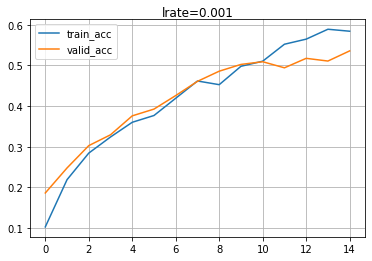

In [ ]:
model_com1 = compiler(model1,traingen,validgen,700,30,0.001)

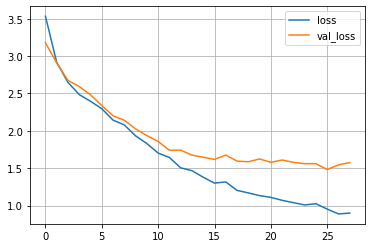

In [ ]:
history = model_com1[1]
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def get_predictions(n):
    image1= validgen[0][0][n]
    plt.imshow(image1)

    input_arr = ks.preprocessing.image.img_to_array(validgen[0][0][n])
    input_arr = np.array([input_arr])

    predictions = model_com1[0].predict(input_arr)

    return predictions

array([[5.2112771e-08, 4.4124808e-02, 2.5182039e-02, 8.0216625e-05,
        8.9830422e-08, 3.1515545e-05, 6.6807424e-03, 5.6844205e-01,
        3.5536423e-01, 8.0515457e-07, 3.3469988e-07, 2.3394518e-14,
        6.5409793e-09, 6.0540600e-08, 3.1847740e-09, 1.8571656e-06,
        4.4945847e-07, 4.6284001e-07, 1.6156822e-07, 6.0935450e-05,
        1.8080737e-11, 5.6660782e-14, 1.9987385e-11, 1.9074791e-05,
        8.3895902e-06, 1.0686622e-08, 6.6738032e-10, 1.4027913e-12,
        8.7462086e-12, 3.4243476e-11, 5.1933219e-10, 2.0047680e-10,
        1.7278644e-11, 1.9518773e-09, 2.4797497e-10, 3.9955583e-07,
        2.7141291e-09, 8.1231322e-13, 1.5714946e-09, 1.3538702e-10,
        1.2913931e-06, 3.0845360e-08, 8.7562491e-10, 2.0358629e-08,
        2.0913382e-11, 7.5525641e-10]], dtype=float32)

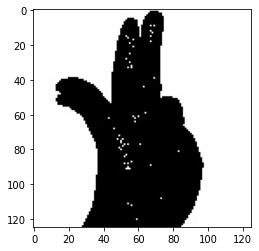

In [ ]:
get_predictions(10)

In [ ]:
signs = validgen.class_indices

In [ ]:
signs

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'Ba': 11,
 'Bha': 12,
 'CA': 13,
 'CHA': 14,
 'Da': 15,
 'Dha': 16,
 'E': 17,
 'GA': 18,
 'GHA': 19,
 'H': 20,
 'Ha': 21,
 'I': 22,
 'JA': 23,
 'JHA': 24,
 'KA': 25,
 'KHA': 26,
 'La': 27,
 'Ma': 28,
 'Na': 29,
 'O': 30,
 'Pa': 31,
 'Pha': 32,
 'Ra': 33,
 'Sa': 34,
 'Ta': 35,
 'Tha': 36,
 'U': 37,
 'Ya': 38,
 'ada': 39,
 'ang': 40,
 'с╕Мa': 41,
 'с╕Мha': 42,
 'с╣мa': 43,
 'с╣мha': 44,
 '─А': 45}

In [ ]:
def getdata(folder_path):
    sig = pd.DataFrame(columns=['image_abs_path','image_labels'])

    for key,value in signs.items():
        label_i = folder_path+"/"+str(key)
        dirs_label_i =  os.listdir(label_i)
        idx = 0
        for image in dirs_label_i:
            sig_i = os.path.join(label_i,image)
            sig = sig.append({'image_abs_path':sig_i,'image_labels':key},ignore_index=True)
            idx += 1
            
    return sig

In [ ]:
train=getdata(main_dir)
train

,image_abs_path,image_labels
0,/content/Bangla Sign Language/0/63.JPG,0
1,/content/Bangla Sign Language/0/91.JPG,0
2,/content/Bangla Sign Language/0/31.JPG,0
3,/content/Bangla Sign Language/0/74.JPG,0
4,/content/Bangla Sign Language/0/44.JPG,0
...,...,...
2064,/content/Bangla Sign Language/─А/IMG_9547.JPG,─А
2065,/content/Bangla Sign Language/─А/DSC_1536.JPG,─А
2066,/content/Bangla Sign Language/─А/IMG_9350.JPG,─А
2067,/content/Bangla Sign Language/─А/IMG_9264.JPG,─А


In [ ]:
def get_n_images(n,df,label):
    warnings.filterwarnings('ignore')
    train = df[df["image_labels"]==label]
    print(len(train))
    i = 0
    m = n/2
    plt.figure(figsize=(12, 6))

    for path in train['image_abs_path'][0:n]:
        plt.subplot(2,m,i+1)
        get_image(path)
        i += 1
        
    plt.tight_layout()
    plt.show()

28


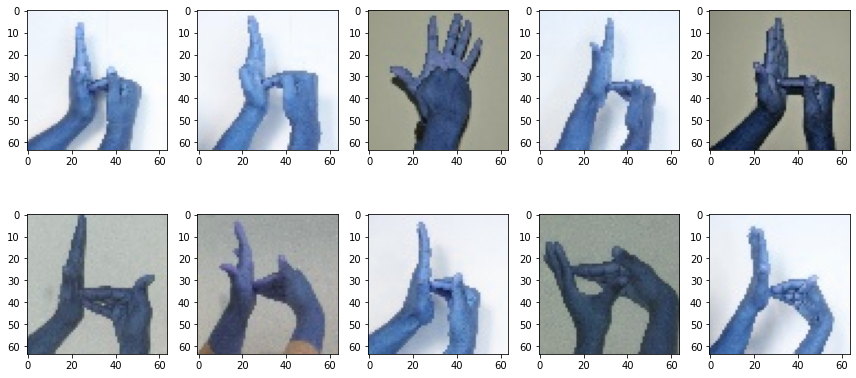

In [ ]:
get_n_images(10,train,'CA')

In [ ]:
model=model_com1[0]
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f73daecc650>>